# <font color='blue'>SETUP</font>
Move to recipe path

In [2]:
import os
os.chdir("/home/dariocazzani/espnet/egs/an4/tts1")

In [3]:
!tree -L 1

.
├── cmd.sh
├── conf
├── data
├── downloads
├── dump
├── exp
├── fbank
├── local -> ../asr1/local
├── path.sh
├── run.sh
├── steps -> ../../../tools/kaldi/egs/wsj/s5/steps
├── tensorboard
└── utils -> ../../../tools/kaldi/egs/wsj/s5/utils

10 directories, 3 files


# <font color='blue'>Stage -1: Data download</font>

In [4]:
!./run.sh --stage -1 --stop_stage -1
!tree -L 1
!ls downloads/

stage -1: Data Download
local/download_and_untar.sh: an4 directory already exists in ./downloads
dictionary: data/lang_1char/train_nodev_units.txt
.
├── cmd.sh
├── conf
├── data
├── downloads
├── dump
├── exp
├── fbank
├── local -> ../asr1/local
├── path.sh
├── run.sh
├── steps -> ../../../tools/kaldi/egs/wsj/s5/steps
├── tensorboard
└── utils -> ../../../tools/kaldi/egs/wsj/s5/utils

10 directories, 3 files
an4  an4_sphere.tar.gz


The **downloads** folder contains the **an4 dataset**

# <font color='blue'>Stage 0: Data preparation</font>

In [5]:
!./run.sh --stage 0 --stop_stage 0

stage 0: Data preparation
dictionary: data/lang_1char/train_nodev_units.txt


Through the data preparation stage, kaldi-style data directories will be created.<br>
Here, **data/train/** is corresponding to training set, and **data/test** is corresponding to evaluation set.
Each directory has the same following files:

In [6]:
!ls data/*

data/lang_1char:
train_nodev_units.txt

data/test:
feats.scp  filetype  spk2utt  text  utt2num_frames  utt2spk  wav.scp

data/train:
filetype  spk2utt  text  utt2num_frames  utt2spk  wav.scp

data/train_dev:
feats.scp  spk2utt  text  utt2num_frames  utt2spk  wav.scp

data/train_nodev:
cmvn.ark  feats.scp  spk2utt  text  utt2num_frames  utt2spk  wav.scp


### wav.scp content
List of audio path. <br>Each line has `<utt_id>` `<wavfile_path or command pipe>`. <br>`<utt_id>` must be unique.

In [7]:
!head -n 4 data/train/wav.scp

fash-an251-b /home/dariocazzani/espnet/egs/an4/tts1/../../../tools/kaldi/tools/sph2pipe_v2.5/sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/an251-fash-b.sph |
fash-an253-b /home/dariocazzani/espnet/egs/an4/tts1/../../../tools/kaldi/tools/sph2pipe_v2.5/sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/an253-fash-b.sph |
fash-an254-b /home/dariocazzani/espnet/egs/an4/tts1/../../../tools/kaldi/tools/sph2pipe_v2.5/sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/an254-fash-b.sph |
fash-an255-b /home/dariocazzani/espnet/egs/an4/tts1/../../../tools/kaldi/tools/sph2pipe_v2.5/sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/an255-fash-b.sph |


### text content
List of transcriptions. <br>
Each line has `<utt_id>` `<transcription>`. <br>In the case of **TTS**, we assume that <transcription> is cleaned. 

In [8]:
!head -n 10 data/train/text

fash-an251-b YES
fash-an253-b GO
fash-an254-b YES
fash-an255-b U M N Y H SIX
fash-cen1-b H I N I C H
fash-cen2-b A M Y
fash-cen4-b M O R E W O O D
fash-cen5-b P I T T S B U R G H
fash-cen7-b TWO SIX EIGHT FOUR FOUR ONE EIGHT
fbbh-an86-b C Z D Z W EIGHT


### utt2spk content

List of correspondence table between utterances and speakers.<br> Each line has `<utt_id> <speaker_id>`

In [9]:
!head -n 4 data/train/utt2spk

fash-an251-b fash
fash-an253-b fash
fash-an254-b fash
fash-an255-b fash


### spk2utt content

List of correspondence table between speakers and utterances.<br>
Each line has `<speaker_id> <utt_id> ... <utt_id>`. <br>
This file can be automatically created from utt2spk.

# <font color='blue'>Stage 1: Features extraction</font>
<br>This stage performs the following processing: 
1. Mel-spectrogram extraction 
2. Data split into training and validation set 
3. Statistics (mean and variance) calculation 
4. Normalization

In [10]:
!./run.sh --stage 1 --stop_stage 1 --nj 4

stage 1: Feature Generation
/home/dariocazzani/espnet/egs/an4/tts1/../../../utils/make_fbank.sh --cmd run.pl --nj 4 --fs 16000 --fmax  --fmin  --n_fft 1024 --n_shift 256 --win_length  --n_mels 80 data/train exp/make_fbank/train fbank
utils/validate_data_dir.sh: Successfully validated data-directory data/train
/home/dariocazzani/espnet/egs/an4/tts1/../../../utils/make_fbank.sh: [info]: no segments file exists: assuming pcm.scp indexed by utterance.
Succeeded creating filterbank features for train
/home/dariocazzani/espnet/egs/an4/tts1/../../../utils/make_fbank.sh --cmd run.pl --nj 4 --fs 16000 --fmax  --fmin  --n_fft 1024 --n_shift 256 --win_length  --n_mels 80 data/test exp/make_fbank/test fbank
/home/dariocazzani/espnet/egs/an4/tts1/../../../utils/make_fbank.sh: moving data/test/feats.scp to data/test/.backup
utils/validate_data_dir.sh: Successfully validated data-directory data/test
/home/dariocazzani/espnet/egs/an4/tts1/../../../utils/make_fbank.sh: [info]: no segments file exists: 

### Data

Raw filterbanks are saved in fbank/ directory with ark/scp format.

In [11]:
!ls fbank

raw_fbank_test.1.ark  raw_fbank_test.4.ark   raw_fbank_train.3.ark
raw_fbank_test.1.scp  raw_fbank_test.4.scp   raw_fbank_train.3.scp
raw_fbank_test.2.ark  raw_fbank_train.1.ark  raw_fbank_train.4.ark
raw_fbank_test.2.scp  raw_fbank_train.1.scp  raw_fbank_train.4.scp
raw_fbank_test.3.ark  raw_fbank_train.2.ark
raw_fbank_test.3.scp  raw_fbank_train.2.scp


`.ark` is binary file <br>
`.scp` contains the correspondence between `<utt_id>` and `<path_in_ark>`.

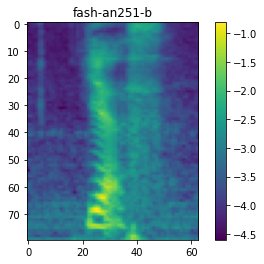

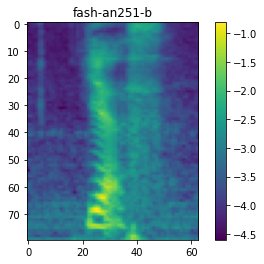

In [12]:
import kaldiio
import matplotlib.pyplot as plt

# load scp file
scp_dict = kaldiio.load_scp("fbank/raw_fbank_train.1.scp")
for key in scp_dict:
    plt.imshow(scp_dict[key].T[::-1])
    plt.title(key)
    plt.colorbar()
    plt.show()
    break

# load ark file
ark_generator = kaldiio.load_ark("fbank/raw_fbank_train.1.ark")
for key, array in ark_generator:
    plt.imshow(array.T[::-1])
    plt.title(key)
    plt.colorbar()
    plt.show()
    break

# Stage 2: Dictionary and json preparation <br>
Create the dictionary and the json files needed for training

In [13]:
!./run.sh --stage 2 --stop_stage 2

dictionary: data/lang_1char/train_nodev_units.txt
stage 2: Dictionary and Json Data Preparation
28 data/lang_1char/train_nodev_units.txt
/home/dariocazzani/espnet/egs/an4/tts1/../../../utils/data2json.sh --feat dump/train_nodev/feats.scp data/train_nodev data/lang_1char/train_nodev_units.txt
/home/dariocazzani/espnet/egs/an4/tts1/../../../utils/feat_to_shape.sh --cmd run.pl --nj 1 --filetype  --preprocess-conf  --verbose 0 dump/train_nodev/feats.scp data/train_nodev/tmp-VKpPD/input_1/shape.scp
/home/dariocazzani/espnet/egs/an4/tts1/../../../utils/data2json.sh --feat dump/train_dev/feats.scp data/train_dev data/lang_1char/train_nodev_units.txt
/home/dariocazzani/espnet/egs/an4/tts1/../../../utils/feat_to_shape.sh --cmd run.pl --nj 1 --filetype  --preprocess-conf  --verbose 0 dump/train_dev/feats.scp data/train_dev/tmp-lFDdC/input_1/shape.scp
/home/dariocazzani/espnet/egs/an4/tts1/../../../utils/data2json.sh --feat dump/test/feats.scp data/test data/lang_1char/train_nodev_units.txt
/home

### Dictionary
it consists of `<token> <token index>`.
Here, `<token index>` starts from 1 because 0 is used as padding index.

In [14]:
!ls data
!cat data/lang_1char/train_nodev_units.txt

lang_1char  test  train  train_dev  train_nodev
<unk> 1
<space> 2
A 3
B 4
C 5
D 6
E 7
F 8
G 9
H 10
I 11
J 12
K 13
L 14
M 15
N 16
O 17
P 18
Q 19
R 20
S 21
T 22
U 23
V 24
W 25
X 26
Y 27
Z 28


### Json

Json file will be created for `training / validation /evaludation` sets

In [15]:
!ls dump/*/*.json
!head -n 27 dump/train_nodev/data.json

dump/test/data.json  dump/train_dev/data.json  dump/train_nodev/data.json
{
    "utts": {
        "fash-an251-b": {
            "input": [
                {
                    "feat": "/home/dariocazzani/espnet/egs/an4/tts1/dump/train_nodev/feats.1.ark:13",
                    "name": "input1",
                    "shape": [
                        63,
                        80
                    ]
                }
            ],
            "output": [
                {
                    "name": "target1",
                    "shape": [
                        3,
                        30
                    ],
                    "text": "YES",
                    "token": "Y E S",
                    "tokenid": "27 7 21"
                }
            ],
            "utt2spk": "fash"
        },


* **shape**: Shape of the input or output sequence. Here input shape [63, 80] (frames, mel-coefficient)
* **text**: Original transcription.
* **token**: Token sequence of original transcription.
* **tokenid** Token id sequence of original transcription, which is converted using the dictionary.



# <font color='blue'>Stage 3: Training</font>

Training configurations are stored in `conf/train_pytroch_tacotron2.yaml.`

In [16]:
!cat conf/train_pytorch_tacotron2.yaml


# This is the basic tactron2 training settting

# encoder related
embed-dim: 512
elayers: 1
eunits: 512
econv-layers: 3 # if set 0, no conv layer is used
econv-chans: 512
econv-filts: 5

# decoder related
dlayers: 2
dunits: 1024
prenet-layers: 2  # if set 0, no prenet is used
prenet-units: 256
postnet-layers: 5 # if set 0, no postnet is used
postnet-chans: 512
postnet-filts: 5

# attention related
atype: location
adim: 128
aconv-chans: 32
aconv-filts: 15      # resulting in filter-size = aconv-filts * 2 + 1
cumulate-att-w: true # whether to cumulate attetion weight
use-batch-norm: true # whether to use batch normalization in conv layer
use-concate: true    # whether to concatenate encoder embedding with decoder lstm outputs
use-residual: false  # whether to use residual connection in encoder convolution
use-masking: true    # whether to mask the padded part in loss calculation
bce-pos-weight: 1.0  # weight for positive samples of stop token in cross-entropy calculation
reduction-factor

### Let's create a backup configuration file to run for 50 epochs

In [68]:
!cat conf/train_pytorch_tacotron2.yaml | sed -e "s/epochs: 50/epochs: 50/g" > conf/train_pytorch_tacotron2_sample.yaml

### Run training

In [69]:
!./run.sh --stage 3 --stop_stage 3 --train_config conf/train_pytorch_tacotron2_sample.yaml --verbose 1

dictionary: data/lang_1char/train_nodev_units.txt
stage 3: Text-to-speech model training


### Checking the progress

In [70]:
!cat exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/train.log

# tts_train.py --backend pytorch --ngpu 1 --minibatches 0 --outdir exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/results --tensorboard-dir tensorboard/train_nodev_pytorch_train_pytorch_tacotron2_sample --verbose 1 --seed 1 --resume --train-json dump/train_nodev/data.json --valid-json dump/train_dev/data.json --config conf/train_pytorch_tacotron2_sample.yaml 
# Started at Wed Jun 17 01:29:15 UTC 2020
#
2020-06-17 01:29:17,043 (tts_train:339) INFO: ngpu: 1
2020-06-17 01:29:17,043 (tts_train:342) INFO: random seed = 1
2020-06-17 01:29:17,078 (deterministic_utils:26) INFO: torch type check is disabled
2020-06-17 01:29:17,096 (tts:279) INFO: #input dims : 30
2020-06-17 01:29:17,096 (tts:280) INFO: #output dims: 80
2020-06-17 01:29:17,096 (tts:297) INFO: writing a model config file toexp/train_nodev_pytorch_train_pytorch_tacotron2_sample/results/model.json
2020-06-17 01:29:17,097 (tts:304) INFO: ARGS: accum_grad: 1
2020-06-17 01:29:17,097 (tts:304) INFO: ARGS: aconv_chans: 32
2020-0

### Models checkpoints

In [71]:
!ls exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/results

all_loss.png	 snapshot.ep.12  snapshot.ep.23  snapshot.ep.34  snapshot.ep.45
att_ws		 snapshot.ep.13  snapshot.ep.24  snapshot.ep.35  snapshot.ep.46
bce_loss.png	 snapshot.ep.14  snapshot.ep.25  snapshot.ep.36  snapshot.ep.47
l1_loss.png	 snapshot.ep.15  snapshot.ep.26  snapshot.ep.37  snapshot.ep.48
log		 snapshot.ep.16  snapshot.ep.27  snapshot.ep.38  snapshot.ep.49
loss.png	 snapshot.ep.17  snapshot.ep.28  snapshot.ep.39  snapshot.ep.5
model.json	 snapshot.ep.18  snapshot.ep.29  snapshot.ep.4	 snapshot.ep.50
model.loss.best  snapshot.ep.19  snapshot.ep.3	 snapshot.ep.40  snapshot.ep.6
mse_loss.png	 snapshot.ep.2	 snapshot.ep.30  snapshot.ep.41  snapshot.ep.7
snapshot.ep.1	 snapshot.ep.20  snapshot.ep.31  snapshot.ep.42  snapshot.ep.8
snapshot.ep.10	 snapshot.ep.21  snapshot.ep.32  snapshot.ep.43  snapshot.ep.9
snapshot.ep.11	 snapshot.ep.22  snapshot.ep.33  snapshot.ep.44


### Training curves

all loss curve


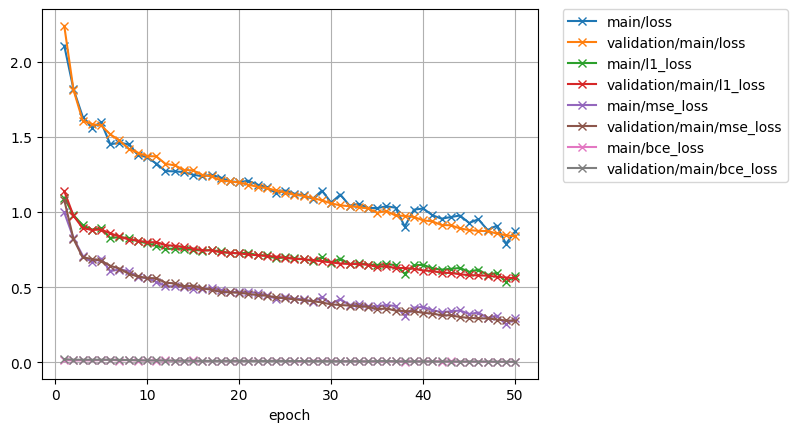

l1 loss curve


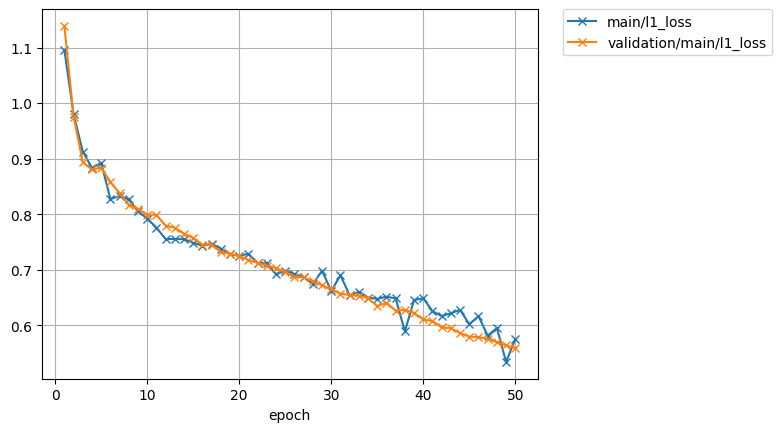

mse loss curve


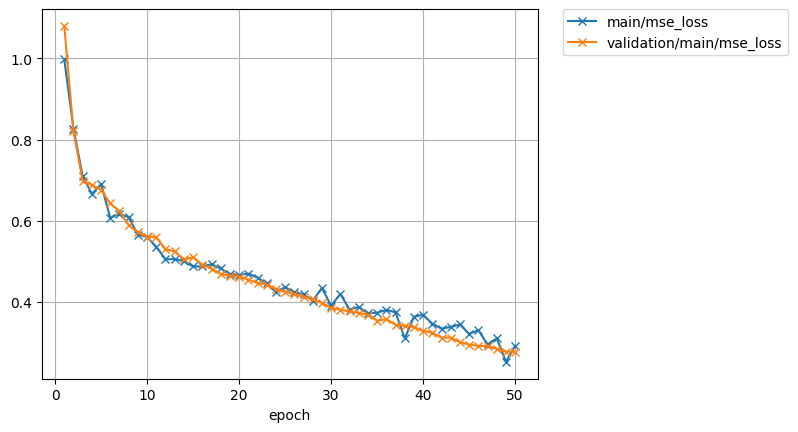

bce loss curve


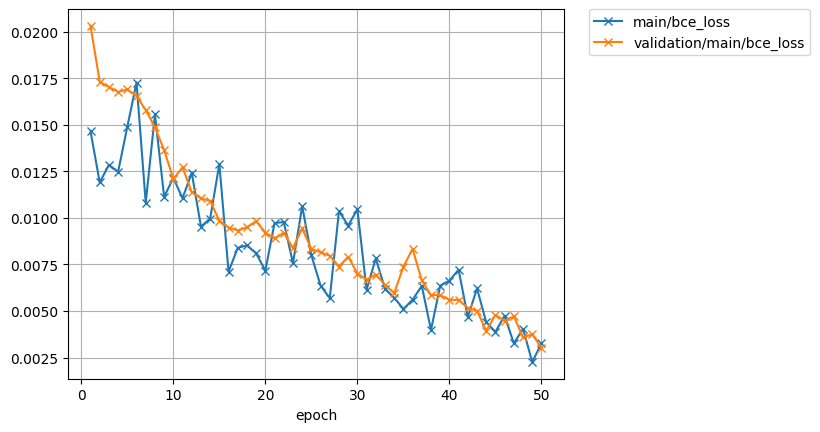

In [72]:
from IPython.display import Image, display_png
print("all loss curve")
display_png(Image("exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/results/all_loss.png"))
print("l1 loss curve")
display_png(Image("exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/results/l1_loss.png"))
print("mse loss curve")
display_png(Image("exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/results/mse_loss.png"))
print("bce loss curve")
display_png(Image("exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/results/bce_loss.png"))

### Best model
**`exp/train_*/results/model.loss.best`** contains only the model parameters.

### To resume training 
(from snapchot 2 for example)

In [73]:
#!./run.sh --stage 3 --stop_stage 3 --train_config conf/train_pytorch_tacotron2_sample.yaml --resume exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/results/snapshot.ep.2 --verbose 1

# <font color='blue'>Stage 4: Decoding</font>

### This stage performs decoding using the trained model to generate mel-spectrogram from a given text.

In [74]:
!./run.sh --stage 4 --stop_stage 4 --nj 8 --train_config conf/train_pytorch_tacotron2_sample.yaml

dictionary: data/lang_1char/train_nodev_units.txt
stage 4: Decoding
2020-06-17 01:52:56,519 (splitjson:43) INFO: /home/dariocazzani/Envs/tts/bin/python3 /home/dariocazzani/espnet/egs/an4/tts1/../../../utils/splitjson.py --parts 8 exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode/train_dev/data.json
2020-06-17 01:52:56,520 (splitjson:55) INFO: number of utterances = 100
2020-06-17 01:52:56,527 (splitjson:43) INFO: /home/dariocazzani/Envs/tts/bin/python3 /home/dariocazzani/espnet/egs/an4/tts1/../../../utils/splitjson.py --parts 8 exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode/test/data.json
2020-06-17 01:52:56,529 (splitjson:55) INFO: number of utterances = 130


### Generated features are saved as ark/scp format.

In [75]:
!ls exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/ /*

/initrd.img  /initrd.img.old  /swapfile  /vmlinuz  /vmlinuz.old

/bin:
bash	       false	   mt-gnu		 systemd-hwdb
bunzip2        fgrep	   mv			 systemd-inhibit
busybox        findmnt	   nano			 systemd-machine-id-setup
bzcat	       grep	   netstat		 systemd-notify
bzcmp	       gunzip	   networkctl		 systemd-sysusers
bzdiff	       gzexe	   nisdomainname	 systemd-tmpfiles
bzegrep        gzip	   pidof		 systemd-tty-ask-password-agent
bzexe	       hostname    ping			 tailf
bzfgrep        ip	   ping4		 tar
bzgrep	       journalctl  ping6		 tempfile
bzip2	       kill	   ps			 touch
bzip2recover   kmod	   pwd			 true
bzless	       less	   rbash		 udevadm
bzmore	       lessecho    readlink		 umount
cat	       lessfile    rm			 uname
chgrp	       lesskey	   rmdir		 uncompress
chmod	       lesspipe    rnano		 vdir
chown	       ln	   run-parts		 wdctl
cp	       login	   sed			 which
cpio	       loginctl    sh			 ypdomainname
dash	       ls	   sh.distrib		 zcat
date	       lsblk	   sleep		 zcmp
dd

### We can specify the model or snapshot to be used for decoding via **–model**.

In [76]:
!./run.sh --stage 4 --stop_stage 4 --nj 8 --train_config conf/train_pytorch_tacotron2_sample.yaml #--model snapshot.ep.59

dictionary: data/lang_1char/train_nodev_units.txt
stage 4: Decoding
2020-06-17 01:53:20,040 (splitjson:43) INFO: /home/dariocazzani/Envs/tts/bin/python3 /home/dariocazzani/espnet/egs/an4/tts1/../../../utils/splitjson.py --parts 8 exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode/test/data.json
2020-06-17 01:53:20,041 (splitjson:43) INFO: /home/dariocazzani/Envs/tts/bin/python3 /home/dariocazzani/espnet/egs/an4/tts1/../../../utils/splitjson.py --parts 8 exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode/train_dev/data.json
2020-06-17 01:53:20,042 (splitjson:55) INFO: number of utterances = 130
2020-06-17 01:53:20,042 (splitjson:55) INFO: number of utterances = 100


In [77]:
!ls exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode/*

exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode/test:
att_ws	     feats.2.ark  feats.4.ark  feats.6.ark  feats.8.ark  probs
data.json    feats.2.scp  feats.4.scp  feats.6.scp  feats.8.scp  split8utt
feats.1.ark  feats.3.ark  feats.5.ark  feats.7.ark  feats.scp
feats.1.scp  feats.3.scp  feats.5.scp  feats.7.scp  log

exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode/train_dev:
att_ws	     feats.2.ark  feats.4.ark  feats.6.ark  feats.8.ark  probs
data.json    feats.2.scp  feats.4.scp  feats.6.scp  feats.8.scp  split8utt
feats.1.ark  feats.3.ark  feats.5.ark  feats.7.ark  feats.scp
feats.1.scp  feats.3.scp  feats.5.scp  feats.7.scp  log


### Visualize decoded mel spectrogram from test files

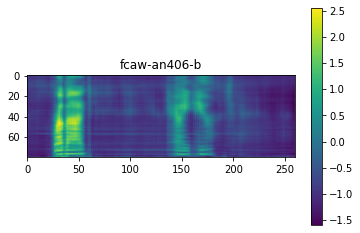

In [78]:
import kaldiio
import matplotlib.pyplot as plt

# load scp file
scp_dict = kaldiio.load_scp("exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode/test/feats.1.scp")
for key in scp_dict:
    plt.imshow(scp_dict[key].T[::-1])
    plt.title(key)
    plt.colorbar()
    plt.show()
    break

name = key

In [79]:
import json
path = "exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode/test/data.json"
with open(path) as json_file:
    data = json.load(json_file)
print(data.get('utts').get(name).get("output")[0].get("text"))

RUBOUT G M E F THREE NINE


# <font color='blue'>Stage 5: Waveform synthesis</font>

### Finally, in this stage, we generate waveform using **Grrifin-Lim algorithm**.
First, we perform de-normalization to convert the generated mel-spectrogram into the original scale. <br>
Then we apply Grrifin-Lim algorithm to restore phase components and apply inverse STFT to generate waveforms.

In [80]:
!./run.sh --stage 5 --stop_stage 5 --nj 8 --train_config conf/train_pytorch_tacotron2_sample.yaml --griffin_lim_iters 50

dictionary: data/lang_1char/train_nodev_units.txt
stage 5: Synthesis
apply-cmvn --norm-vars=true --reverse=true data/train_nodev/cmvn.ark scp:exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode/train_dev/feats.scp ark,scp:exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode_denorm/train_dev/feats.ark,exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode_denorm/train_dev/feats.scp 
apply-cmvn --norm-vars=true --reverse=true data/train_nodev/cmvn.ark scp:exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode/test/feats.scp ark,scp:exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode_denorm/test/feats.ark,exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode_denorm/test/feats.scp 
LOG (apply-cmvn[5.5.428~1-29b3]:main():apply-cmvn.cc:159) Applied cepstral mean and variance normalization to 100 utte

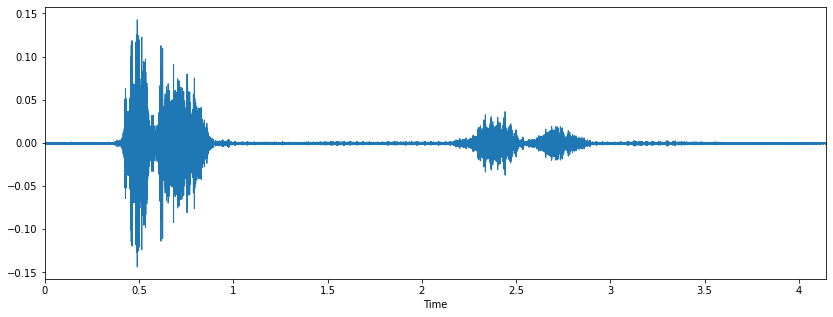

In [81]:
import librosa, os
import librosa.display
path = "exp/train_nodev_pytorch_train_pytorch_tacotron2_sample/outputs_model.loss.best_decode_denorm/test/wav"
y, sr = librosa.load(os.path.join(path, f"{name}.wav"), sr=8000)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

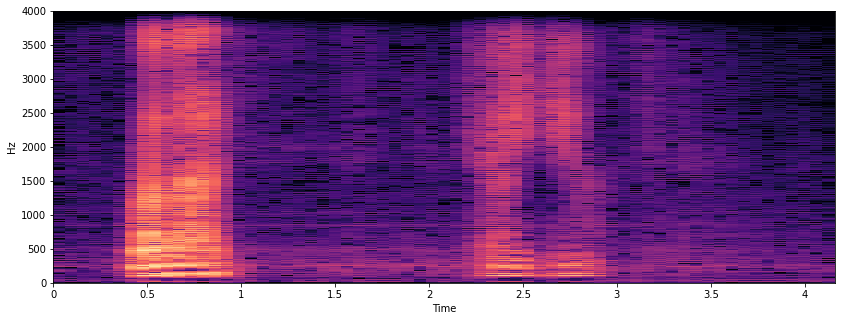

In [82]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [83]:
import IPython.display as ipd
ipd.Audio(y, rate=sr) # load a NumPy array